In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [29]:
df = pd.read_csv('listings summary.csv')

In [30]:
df.dtypes
# do we care about id, name, host_id, host_name (identifiers)?

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [31]:
df.isnull().sum()
# there is missing data! what do we do?!?

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        652
reviews_per_month                  652
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1053
dtype: int64

In [32]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [33]:
df['license'].nunique()

2249

In [34]:
df["neighbourhood_group"].nunique()

17

In [35]:
df["neighbourhood"].nunique()

88

In [36]:
df["minimum_nights"].nunique()

42

In [37]:
df["price"].nunique()

451

In [38]:
df['neighbourhood_group'] = pd.Categorical(df['neighbourhood_group'])
df['neighbourhood_group_code'] = df['neighbourhood_group'].cat.codes

In [39]:
df['neighbourhood_group_code'].unique()

array([ 4, 11, 16,  5,  0,  1,  3,  2, 12,  6,  9,  8, 13, 15, 10, 14,  7],
      dtype=int8)

Text(0, 0.5, 'Counts')

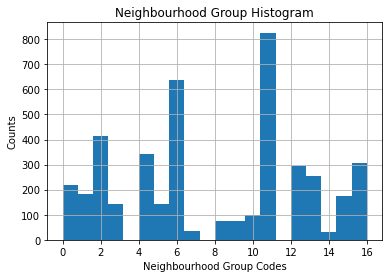

In [40]:
df.hist(column='neighbourhood_group_code', bins = 20)
plt.title('Neighbourhood Group Histogram')
plt.xlabel('Neighbourhood Group Codes')
plt.ylabel('Counts')

In [41]:
df['neighbourhood'] = pd.Categorical(df['neighbourhood'])
df['neighbourhood_code'] = df['neighbourhood'].cat.codes

In [42]:
df['neighbourhood_code'].unique()

array([41, 80, 24, 18, 29, 85, 39, 46, 17, 21,  1, 25, 28, 61, 38, 57, 14,
        4, 36, 50, 55, 82, 20,  9,  2, 34, 52, 26, 11, 13, 49, 42, 23, 12,
       64, 77, 71,  3,  8,  0, 43, 16, 60, 30, 83, 27, 40, 19, 84, 44, 47,
       37, 76, 51,  6, 10, 69,  5, 65,  7, 33, 79, 75, 54, 58, 87, 35, 86,
       62, 68, 78, 66, 22, 15, 74, 56, 81, 53, 59, 48, 45, 63, 70, 32, 73,
       72, 67, 31], dtype=int8)

Text(0, 0.5, 'Counts')

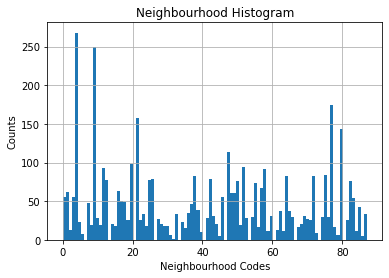

In [43]:
df.hist(column='neighbourhood_code', bins = 100)
plt.title('Neighbourhood Histogram')
plt.xlabel('Neighbourhood Codes')
plt.ylabel('Counts')

<AxesSubplot:>

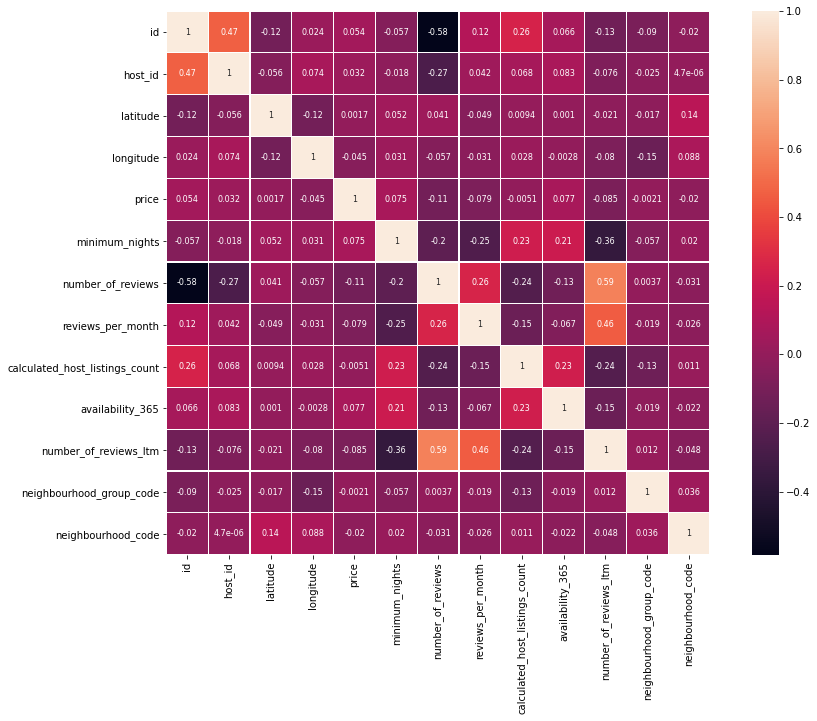

In [65]:
df.corr()
plt.rcParams['figure.figsize'] = [15, 10]
sn.heatmap(df.corr(), vmin=df.corr().values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8})  